# Import libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Visualization of Data Distribution

In [2]:
df = pd.read_csv("clean_compiled_transcripts.csv").sort_values(by=['Participant_ID'], ascending=True)
df.head(10)

,Participant_ID,Transcript,PHQ_Score,PHQ_Binary
0,300,good atlanta um my parents um i love it i like...,2,0
1,301,thank you mmm k i good thank you i los angeles...,3,0
2,302,i fine yourself i los angeles part okay um my ...,4,0
3,303,okay bout yourself yeah oh well it big broad l...,0,0
4,304,i good um los angeles um cool weather beaches ...,6,0
5,305,i alright uh originally i uh born glendale i h...,7,0
6,306,fine uh mhm uh career career possibilities uh ...,0,0
7,307,um moscow um my family moved us i moved eventu...,4,0
8,308,los angeles yes um southern lifestyle beaches ...,22,1
9,309,yeah i good uh uh acting stuff like entertain ...,15,1


In [13]:
X = df["Participant_ID"].values 
y = df["PHQ_Score"].values

print(X)
print(y)

[300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335
 336 337 338 339 340 341 343 344 345 346 347 348 349 350 351 352 353 354
 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372
 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391
 392 393 395 396 397 399 400 401 403 404 405 406 407 408 409 410 411 412
 413 414 415 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432
 433 434 435 436 437 438 439 440 441 442 443 445 446 447 448 449 450 452
 453 454 455 456 457 459 461 462 463 464 465 466 467 468 469 470 471 472
 473 474 475 476 477 478 479 481 482 483 484 485 486 487 488 489 490 491
 492]
[ 2  3  4  0  6  7  0  4 22 15  4 21  2  7  1  2  6  8  3 13 11 20  5  1
  5 10  2  4  4  1 12  8 18  5  5 12  7 10 15 11  1  7  9 11 15 23 16 20
  5 11 14 10 11 18 10 10  7  7 13  4  0 20  0  0 12  0 19  7  0  0  9 13
  2  5 12 16  1  2 10 16  0  7 15  8 11  2 17

In [14]:
def train_test(X, y, testfile):
    test_participants = pd.read_csv(testfile)['participant_ID'].values
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    
    for i in range(y.shape[0]):
        participant_no = y.index[i]
        # print(X[i])
        
        if participant_no in test_participants:
            X_test.append(X[i])
            y_test.append(y[participant_no])
        
        else:
            X_train.append(X[i])
            y_train.append(y[participant_no])
            
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [30]:
testfile = './test_split_Depression_AVEC2017 (3).csv'
y =  pd.read_csv("./clean_compiled_transcripts.csv", index_col = "Participant_ID")['PHQ_Score']

X_train, X_test, y_train, y_test = train_test(X, y, testfile)

print(y_train)
print(y_test)

y_train_avg = sum(y_train)/len(y_train)
y_test_avg = sum(y_test)/len(y_test)

y_overall_avg = (sum(y_train) + sum(y_test)) / (len(y_train)+ len(y_test))

print(y_train_avg)
print(y_test_avg)


[ 4  0  6  7  4  4  2  7  2  6  8  3 13 11 20  5  5 10  2  4  4 12  8  5
 12  7 15 11  1  7  9 11 15 23 16 20 11 14 10 11 10 10  7  7  4 20  0  0
  0 19  7  0  0  9 13  2  5 12 16  2 10 16  0  7  8 11 17 14  9  9  1  2
  7  5  7  9  0  0  2 10 12 10 16  3 10  3  3 12  0  6 20  5  0  1  3 10
  2  0  0  1 19 18  1  1  0  1 18  2  1  1  6  3 16  0  0  4  0  3  0  4
  6  3  2  1  7  1 15  9  2  4  0  0  3  2  8  0]
[ 2  3  0 22 15 21  1  1  1 18  5 10  5 18 13  0 12  1 15  2  5  7 17  3
  0 12  0 10  3  2  1  8  2  6  9  1 17 17  9  2  9  0  3  3  7]
6.6911764705882355
7.066666666666666


## Histogram Plot of PHQ Score Distribution
The higher the PHQ score, the more severe the depression.

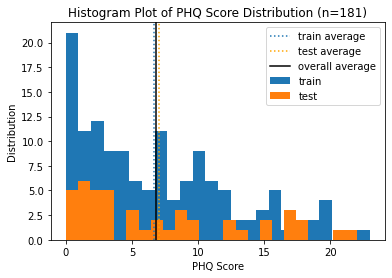

In [32]:
plt.hist(y_train, bins=24, label = "train") # max score is 24
plt.hist(y_test, bins=24, label = "test") # max score is 24
plt.axvline(x = y_train_avg, linestyle = "dotted", label = "train average")
plt.axvline(x = y_test_avg, linestyle = "dotted", color = "orange", label = "test average")
plt.axvline(x = y_overall_avg, color = "black", label = "overall average")


plt.title('Histogram Plot of PHQ Score Distribution (n={})'.format(len(df)))
plt.ylabel('Distribution')
plt.xlabel('PHQ Score')
plt.legend()
plt.show()

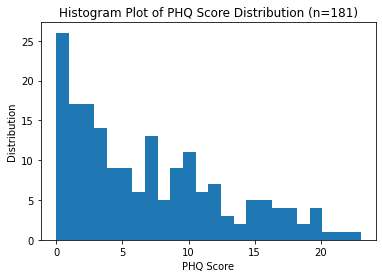

In [3]:
plt.hist(df.PHQ_Score, bins=24) # max score is 24
plt.title('Histogram Plot of PHQ Score Distribution (n={})'.format(len(df)))
plt.ylabel('Distribution')
plt.xlabel('PHQ Score')
plt.show()

## Bar Plot of Depression Cases
A PHQ score of 10 and above is considered as depression.

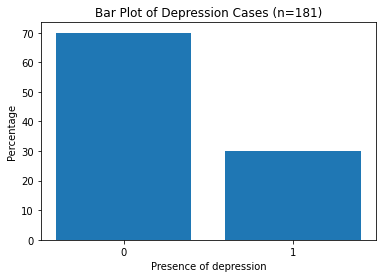

In [ ]:
x_labels = [0, 1]

# Convert to correct percentages in the y axis
percent_negative = round(len(df[df.PHQ_Binary == 0]) / len(df) * 100)
percent_positive = 100 - percent_negative

y_val = [percent_negative, percent_positive]
plt.bar(x_labels, y_val, align='center')
plt.title('Bar Plot of Depression Cases (n={})'.format(len(df)))
plt.ylabel('Percentage')
plt.xlabel('Presence of depression')
plt.xticks(x_labels)
plt.show()

# Analysis of Possible Trends

## Word Count

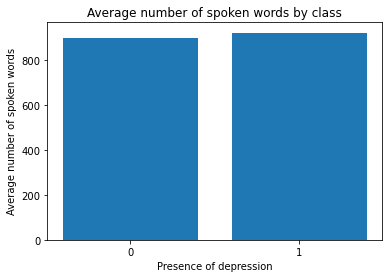

In [ ]:
df_nondepressed = df[df.PHQ_Binary == 0].Transcript
df_depressed = df[df.PHQ_Binary == 1].Transcript

def count_words(df_transcript):
    count = 0
    for transcript in df_transcript:
        words = transcript.split()
        count += len(words)
    return count/len(df_transcript)

y_val = [count_words(df_nondepressed), count_words(df_depressed)]

plt.bar(x_labels, y_val)
plt.title('Average number of spoken words by class')
plt.ylabel('Average number of spoken words')
plt.xlabel('Presence of depression')
plt.xticks(x_labels)
plt.show()

There is only a 2% difference in the average number of spoken words spoken between both classes. The word count feature is unlikely to be useful in model creation.